In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Reading and Understanding Data

Melakukan load dataset, kemudian melihat *overview* dari dataframe.

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Berikut merupakan penjelasan kolom fitur pada dataset:

- **Negara** : Nama *negara*
- **Kematian_anak**: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- **Ekspor** : Ekspor barang dan jasa perkapita
- **Kesehatan**: Total pengeluaran kesehatan perkapita
- **Impor**: Impor barang dan jasa perkapita
- **Pendapatan**: Penghasilan bersih perorang
- **Inflasi**: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- **Harapan_hidup**: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- **Jumlah_fertiliti**: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- **GDPperkapita**: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 

Mengecek tipe fitur dalam dataframe.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
len(df['Negara'].unique())

167

Mengecek statistik dasar.

In [5]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Exploratory Data Analysis (EDA)

## Data Cleaning

Pada dataset tidak terdapat missing values serta seluruh nama negara sudah unik sehingga tidak diperlukan pembersihan data lebih lanjut.

## Univariate Analysis

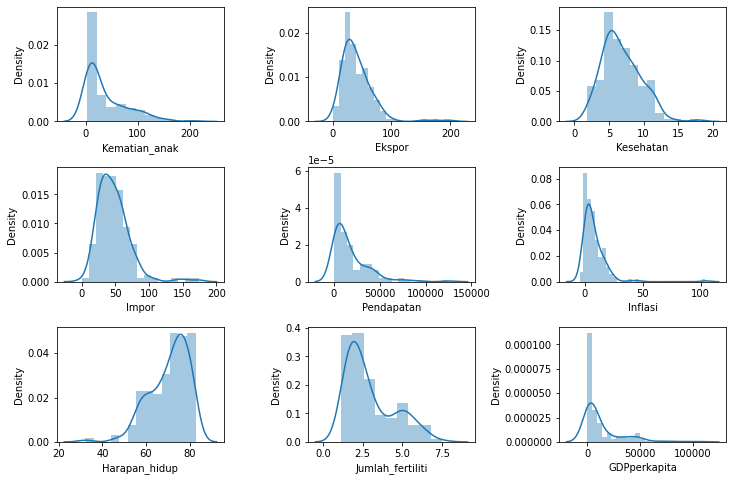

In [6]:
plt.figure(figsize=(12,8))

for i,col_name in enumerate(df.describe().columns):
  plt.subplot(3, 3, i+1)
  sns.distplot(df[col_name])

plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.show()

## Bivariate Analysis

In [7]:
kematian = df.sort_values('Kematian_anak', ascending=False)
fertiliti = df.sort_values('Jumlah_fertiliti', ascending=False)

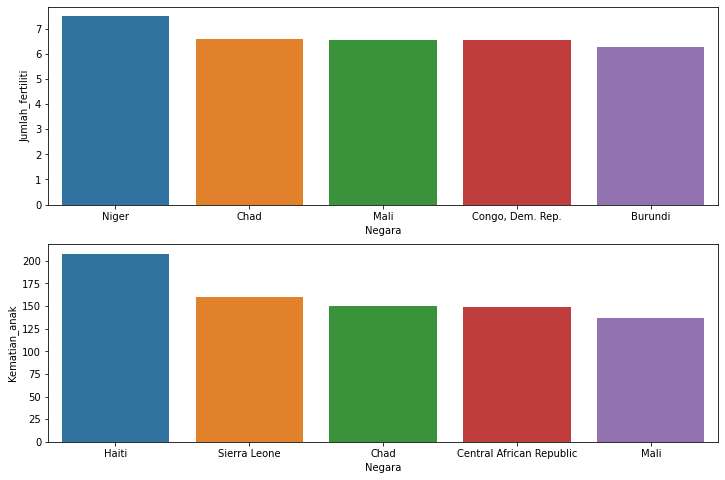

In [8]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.barplot(fertiliti.Negara.head(), fertiliti.Jumlah_fertiliti.head())

plt.subplot(2,1,2)
sns.barplot(kematian.Negara.head(), kematian.Kematian_anak.head())
plt.show()

## Multivariate Analysis

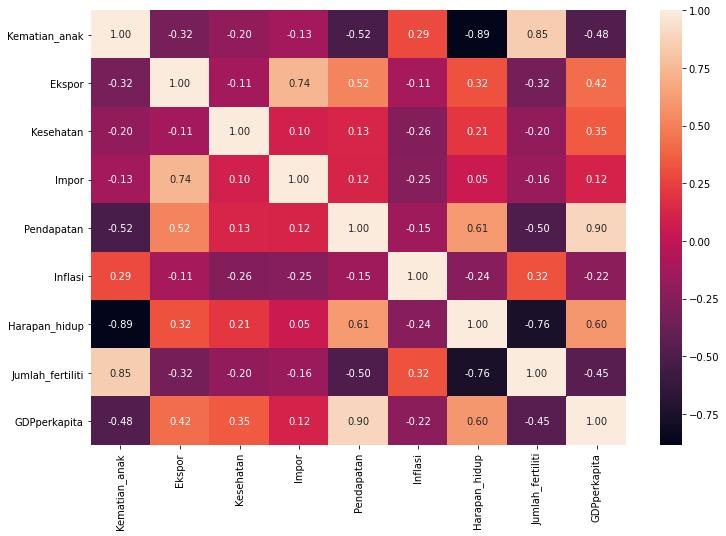

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Outlier Treatment

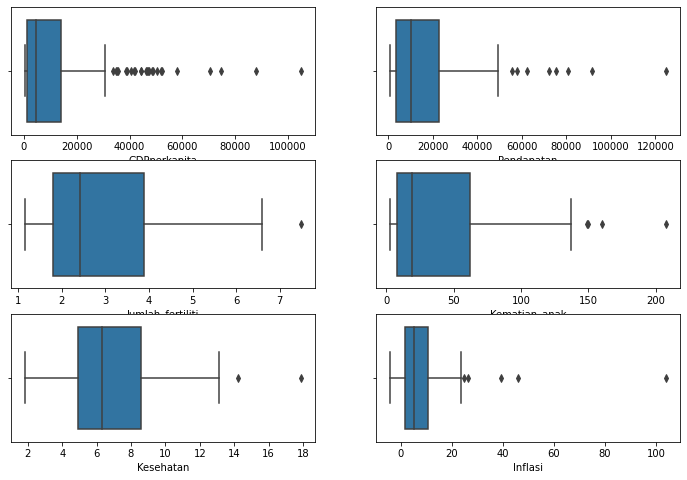

In [10]:
plt.figure(figsize=(12,8))
# GDPperkapita & Pendapatan
plt.subplot(3,2,1)
sns.boxplot(data=df, x='GDPperkapita')
plt.subplot(3,2,2)
sns.boxplot(data=df, x='Pendapatan')

# Jumlah Fertiliti & Kematian Anak
plt.subplot(3,2,3)
sns.boxplot(data=df, x='Jumlah_fertiliti')
plt.subplot(3,2,4)
sns.boxplot(data=df, x='Kematian_anak')

# Kesehatan & Inflasi
plt.subplot(3,2,5)
sns.boxplot(data=df, x='Kesehatan')
plt.subplot(3,2,6)
sns.boxplot(data=df, x='Inflasi')

plt.show()

In [11]:
def get_lower_upper_bound(df):
  ''' Get lower bound & upper bound in df
  INPUT : dataframe
  OUTPUT : (lower_bound, upper_bound)
  '''
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3-q1
  return q1-(iqr*1.5), q3+(iqr*1.5)

def remove_outliers(df):
  ''' Remove outliers in df
  INPUT : dataframe
  OUTPUT : dataframe without the outliers
  '''
  lb, ub = get_lower_upper_bound(df)
  return df[(df>lb) & (df<ub)]

In [12]:
df2 = remove_outliers(df[['GDPperkapita', 'Pendapatan']])
df2.dropna(axis=0, inplace=True)
df3 = remove_outliers(df2[['GDPperkapita', 'Pendapatan']])
df3.dropna(axis=0, inplace=True)
df4 = remove_outliers(df3[['GDPperkapita', 'Pendapatan']])
df4.dropna(axis=0, inplace=True)
df5 = remove_outliers(df4[['GDPperkapita', 'Pendapatan']])
df5.dropna(axis=0, inplace=True)
df5 = pd.merge(df[['Negara','GDPperkapita', 'Pendapatan']], df5, on=['GDPperkapita', 'Pendapatan'])
df5

,Negara,GDPperkapita,Pendapatan
0,Afghanistan,553,1610
1,Albania,4090,9930
2,Algeria,4460,12900
3,Angola,3530,5900
4,Antigua and Barbuda,12200,19100
...,...,...,...
119,Vanuatu,2970,2950
120,Venezuela,13500,16500
121,Vietnam,1310,4490
122,Yemen,1310,4480


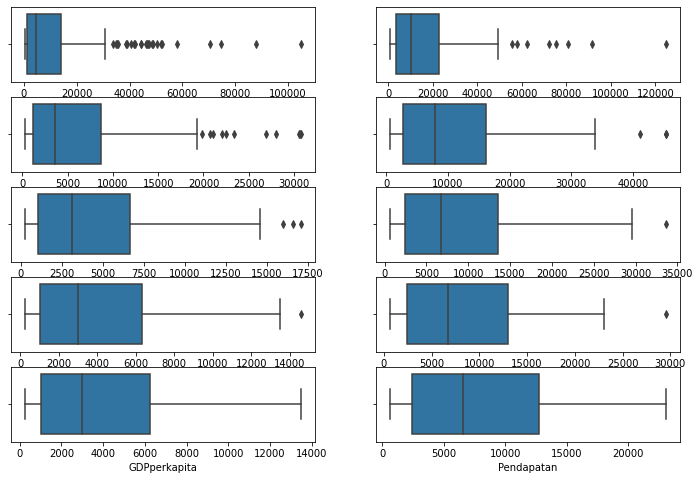

In [13]:
plt.figure(figsize=(12,8))

df_list = [df, df2, df3, df4, df5]
for i in range(10):
  plt.subplot(5,2,i+1)
  even = (i%2 == 0)
  n = i//2
  if even:
    sns.boxplot(data=df_list[n], x='GDPperkapita')
  else:
    sns.boxplot(data=df_list[n], x='Pendapatan')

plt.show()

In [14]:
df1_penduduk = df[['Jumlah_fertiliti', 'Kematian_anak']]
df2_penduduk = remove_outliers(df1_penduduk[['Jumlah_fertiliti', 'Kematian_anak']])
df2_penduduk.dropna(axis=0, inplace=True)
df3_penduduk = remove_outliers(df2_penduduk[['Jumlah_fertiliti', 'Kematian_anak']])
df3_penduduk.dropna(axis=0, inplace=True)
df3_penduduk = pd.merge(df[['Negara', 'Jumlah_fertiliti', 'Kematian_anak']], df3_penduduk, on=['Jumlah_fertiliti', 'Kematian_anak'])
df3_penduduk

,Negara,Jumlah_fertiliti,Kematian_anak
0,Afghanistan,5.82,90.2
1,Albania,1.65,16.6
2,Algeria,2.89,27.3
3,Angola,6.16,119.0
4,Antigua and Barbuda,2.13,10.3
...,...,...,...
154,Vanuatu,3.50,29.2
155,Venezuela,2.47,17.1
156,Vietnam,1.95,23.3
157,Yemen,4.67,56.3


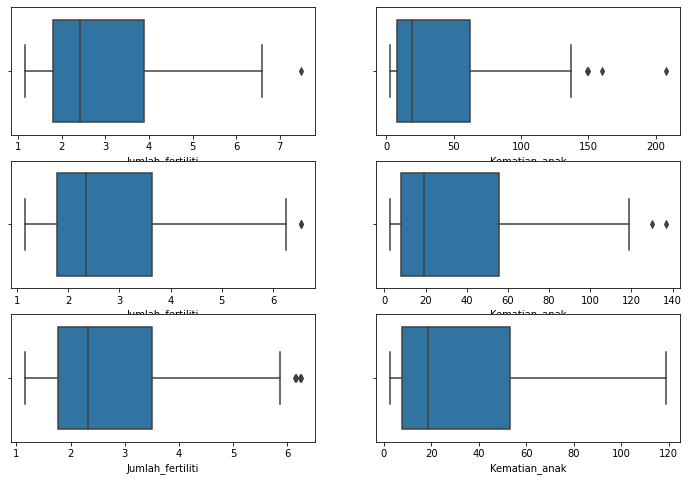

In [15]:
plt.figure(figsize=(12,8))

df_list = [df1_penduduk, df2_penduduk, df3_penduduk]
for i in range(6):
  plt.subplot(3,2,i+1)
  even = (i%2 == 0)
  n = i//2
  if even:
    sns.boxplot(data=df_list[n], x='Jumlah_fertiliti')
  else:
    sns.boxplot(data=df_list[n], x='Kematian_anak')

plt.show()


In [16]:
df_3 = remove_outliers(df[['Kesehatan', 'Inflasi']]).dropna(axis=0, inplace=False)
df_3_1 = remove_outliers(df_3[['Kesehatan', 'Inflasi']]).dropna(axis=0, inplace=False)
df_3_2 = remove_outliers(df_3_1[['Kesehatan', 'Inflasi']]).dropna(axis=0, inplace=False)
df_3_2 = pd.merge(df[['Negara','Kesehatan', 'Inflasi']], df_3_2, on=['Kesehatan', 'Inflasi'])
df_3_2

,Negara,Kesehatan,Inflasi
0,Afghanistan,7.58,9.44
1,Albania,6.55,4.49
2,Algeria,4.17,16.10
3,Antigua and Barbuda,6.03,1.44
4,Armenia,4.40,7.77
...,...,...,...
149,Uruguay,8.35,4.91
150,Uzbekistan,5.81,16.50
151,Vanuatu,5.25,2.62
152,Vietnam,6.84,12.10


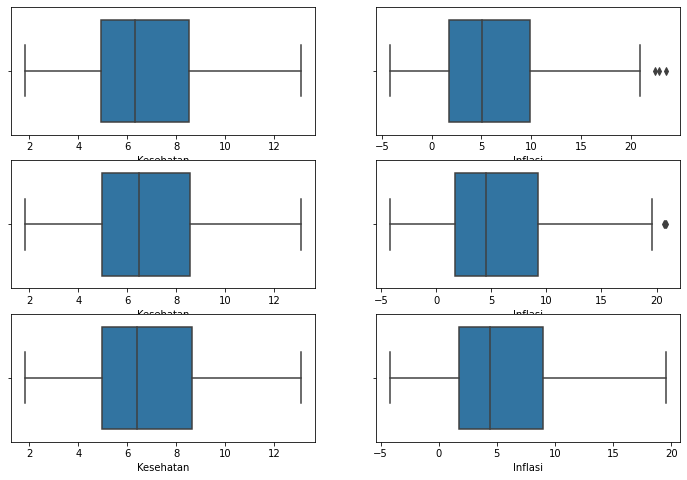

In [17]:
plt.figure(figsize=(12,8))

df_list = [df_3, df_3_1, df_3_2]
for i in range(6):
  plt.subplot(3,2,i+1)
  even = (i%2 == 0)
  n = i//2
  if even:
    sns.boxplot(data=df_list[n], x='Kesehatan')
  else:
    sns.boxplot(data=df_list[n], x='Inflasi')

plt.show()

# Scaling Data

In [18]:
sc = StandardScaler()
df_pendapatan = df5.copy()
df_pendapatan[['GDPperkapita', 'Pendapatan']] = sc.fit_transform(df5[['GDPperkapita', 'Pendapatan']])
df_pendapatan

,Negara,GDPperkapita,Pendapatan
0,Afghanistan,-0.965151,-1.027871
1,Albania,-0.003626,0.290383
2,Algeria,0.096958,0.760962
3,Angola,-0.155861,-0.348146
4,Antigua and Barbuda,2.201058,1.743315
...,...,...,...
119,Vanuatu,-0.308095,-0.815556
120,Venezuela,2.554460,1.331360
121,Vietnam,-0.759362,-0.571552
122,Yemen,-0.759362,-0.573137


In [19]:
kmeans_pendapatan = KMeans(n_clusters=2, random_state=42).fit(df_pendapatan[['GDPperkapita', 'Pendapatan']])
labels_pendapatan = kmeans_pendapatan.labels_

new_df_pendapatan = pd.DataFrame(data=df_pendapatan, columns=['Negara','GDPperkapita', 'Pendapatan'])
new_df_pendapatan['label'] = labels_pendapatan

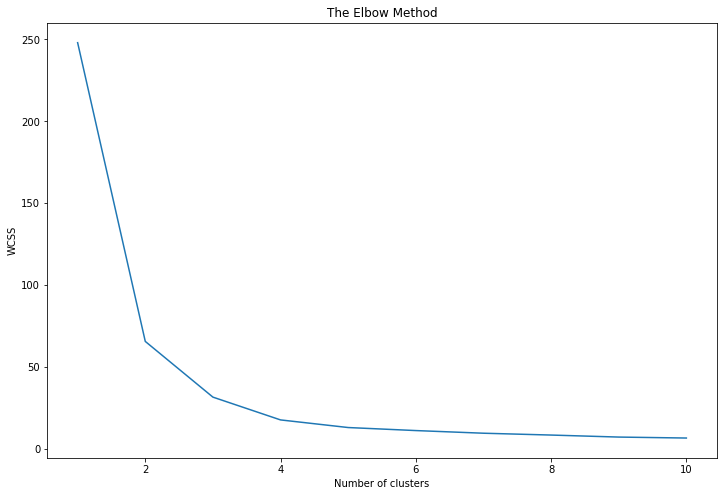

In [20]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(new_df_pendapatan[['GDPperkapita', 'Pendapatan']])
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

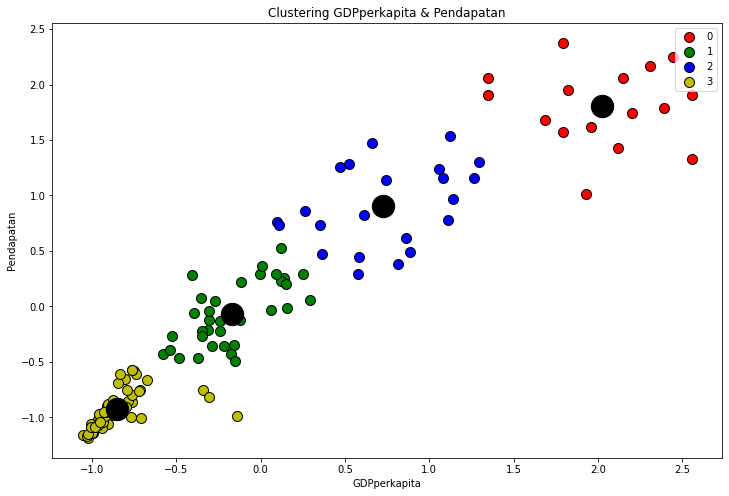

In [35]:
kmeans_pendapatan = KMeans(n_clusters=4, random_state=42).fit(df_pendapatan[['GDPperkapita', 'Pendapatan']])
labels_pendapatan = kmeans_pendapatan.labels_

new_df_pendapatan['label'] = labels_pendapatan

plt.figure(figsize=(12,8))
colors = ['r', 'g', 'b', 'y']
for i, color in enumerate(colors):
  plt.scatter(x=new_df_pendapatan['GDPperkapita'][new_df_pendapatan.label == i], 
              y=new_df_pendapatan['Pendapatan'][new_df_pendapatan.label == i],
              label=i, c=color, edgecolor='k', s=100)

centers = kmeans_pendapatan.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', s=500)
plt.legend()
plt.title('Clustering GDPperkapita & Pendapatan')
plt.xlabel('GDPperkapita')
plt.ylabel('Pendapatan')
plt.show()

In [22]:
print("Nilai silhoutte score kmeans=4 adalah: {0}".format(silhouette_score(new_df_pendapatan[['GDPperkapita', 'Pendapatan']], labels=labels_pendapatan)))

Nilai silhoutte score kmeans=4 adalah: 0.5738002113170448


In [23]:
df_penduduk = df3_penduduk.copy()
df_penduduk[['Jumlah_fertiliti', 'Kematian_anak']] = sc.fit_transform(df3_penduduk[['Jumlah_fertiliti', 'Kematian_anak']])
df_penduduk

,Negara,Jumlah_fertiliti,Kematian_anak
0,Afghanistan,2.202154,1.778547
1,Albania,-0.840850,-0.502684
2,Algeria,0.064024,-0.171038
3,Angola,2.450265,2.671203
4,Antigua and Barbuda,-0.490576,-0.697953
...,...,...,...
154,Vanuatu,0.509164,-0.112147
155,Venezuela,-0.242466,-0.487187
156,Vietnam,-0.621929,-0.295018
157,Yemen,1.362956,0.727817


In [24]:
kmeans_penduduk = KMeans(n_clusters=2, random_state=42).fit(df_penduduk[['Jumlah_fertiliti', 'Kematian_anak']])
labels_penduduk = kmeans_penduduk.labels_

new_df_penduduk = pd.DataFrame(data=df_penduduk, columns=['Negara','Jumlah_fertiliti', 'Kematian_anak'])
new_df_penduduk['label'] = labels_penduduk

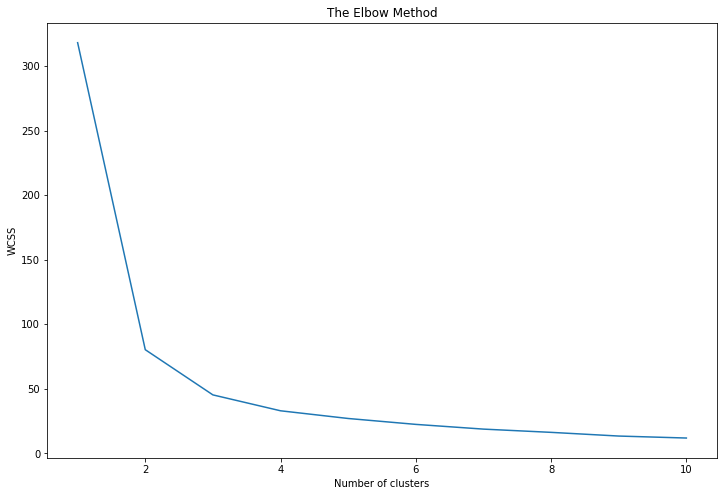

In [25]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(new_df_penduduk[['Jumlah_fertiliti', 'Kematian_anak']])
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

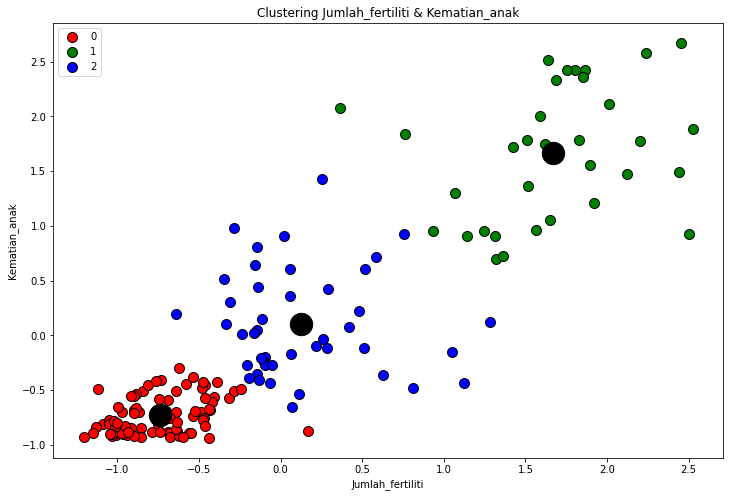

In [36]:
kmeans_penduduk = KMeans(n_clusters=3, random_state=42).fit(df_penduduk[['Jumlah_fertiliti', 'Kematian_anak']])
labels_penduduk = kmeans_penduduk.labels_

new_df_penduduk['label'] = labels_penduduk
plt.figure(figsize=(12,8))
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
  plt.scatter(x=new_df_penduduk['Jumlah_fertiliti'][new_df_penduduk.label == i], 
              y=new_df_penduduk['Kematian_anak'][new_df_penduduk.label == i],
              label=i, c=color, edgecolor='k', s=100)

centers = kmeans_penduduk.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', s=500)
plt.legend()
plt.title('Clustering Jumlah_fertiliti & Kematian_anak')
plt.xlabel('Jumlah_fertiliti')
plt.ylabel('Kematian_anak')
plt.show()

In [27]:
print("Nilai silhoutte score kmeans=3 adalah: {0}".format(silhouette_score(new_df_penduduk[['Jumlah_fertiliti', 'Kematian_anak']], labels=labels_penduduk)))

Nilai silhoutte score kmeans=3 adalah: 0.5518602143255876


In [28]:
df_t = df_3_2.copy()
df_t[['Kesehatan', 'Inflasi']] = sc.fit_transform(df_3_2[['Kesehatan', 'Inflasi']])
df_t

,Negara,Kesehatan,Inflasi
0,Afghanistan,0.304846,0.640793
1,Albania,-0.099255,-0.279274
2,Algeria,-1.033003,1.878701
3,Antigua and Barbuda,-0.303267,-0.846184
4,Armenia,-0.942767,0.330386
...,...,...,...
149,Uruguay,0.606941,-0.201208
150,Uzbekistan,-0.389580,1.953050
151,Vanuatu,-0.609285,-0.626855
152,Vietnam,0.014521,1.135213


In [29]:
kmeans_t = KMeans(n_clusters=2, random_state=42).fit(df_t[['Kesehatan', 'Inflasi']])
labels_t = kmeans_t.labels_

new_df_t = pd.DataFrame(data=df_t, columns=['Negara','Kesehatan', 'Inflasi'])
new_df_t['label'] = labels_t

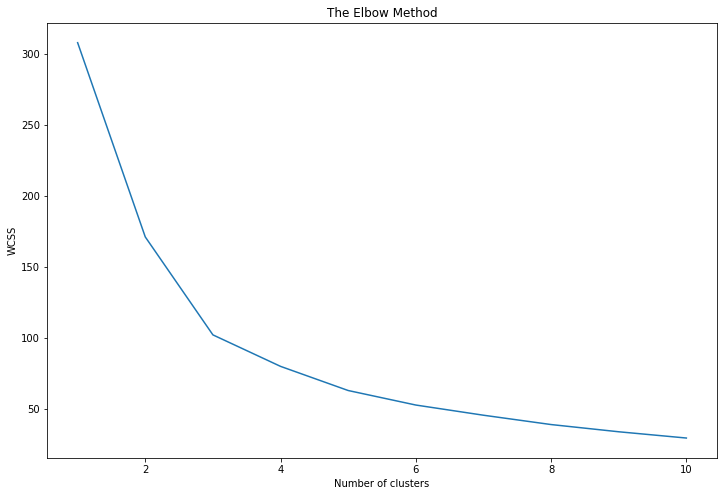

In [30]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
  kmeans.fit(new_df_t[['Kesehatan', 'Inflasi']])
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

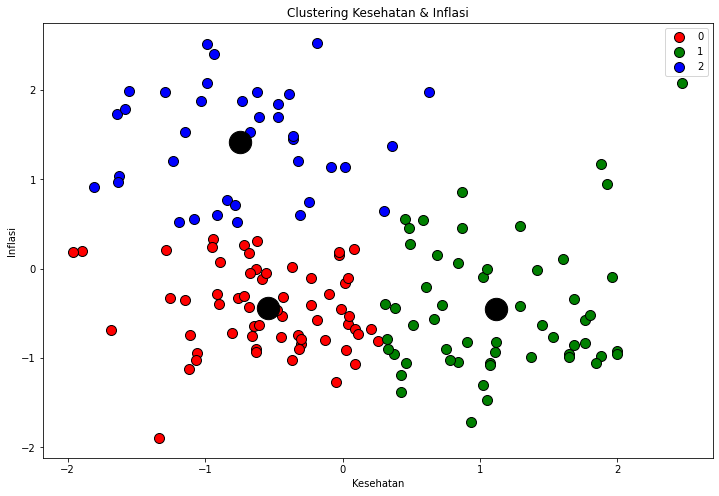

In [37]:
kmeans_t = KMeans(n_clusters=3, random_state=42).fit(df_t[['Kesehatan', 'Inflasi']])
labels_t = kmeans_t.labels_

new_df_t['label'] = labels_t

plt.figure(figsize=(12,8))
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
  plt.scatter(x=new_df_t['Kesehatan'][new_df_t.label == i], 
              y=new_df_t['Inflasi'][new_df_t.label == i],
              label=i, c=color, edgecolor='k', s=100)

centers = kmeans_t.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', s=500)
plt.title('Clustering Kesehatan & Inflasi')
plt.xlabel('Kesehatan')
plt.ylabel('Inflasi')
plt.legend()
plt.show()

In [32]:
print("Nilai silhoutte score kmeans=3 adalah: {0}".format(silhouette_score(new_df_t[['Kesehatan', 'Inflasi']], labels=labels_t)))

Nilai silhoutte score kmeans=3 adalah: 0.41128772615160847


In [33]:
df = pd.merge(df,new_df_pendapatan[['Negara','label']], on=['Negara']).rename(columns = {'label':'label_pendapatan'})
df = pd.merge(df,new_df_penduduk[['Negara','label']], on=['Negara']).rename(columns = {'label':'label_penduduk'})
df = pd.merge(df,new_df_t[['Negara','label']], on=['Negara']).rename(columns = {'label':'label_t'})
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label_pendapatan,label_penduduk,label_t
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,1,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,2,2
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,0
4,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0,0,1
103,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,3,2,2
104,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,2,0
105,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3,0,2


In [34]:
# label_pendapatan == 3
# label_penduduk == 1
result = df[(df['label_pendapatan']==3) & (df['label_penduduk']==1) 
            & (df['label_t']==2) & (df['Impor'] >= df['Ekspor'])
            & (df['GDPperkapita'] <= 975)]

result.reset_index(drop=True)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label_pendapatan,label_penduduk,label_t
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,3,1,2
1,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,3,1,2
2,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,3,1,2
3,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,3,1,2
4,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,3,1,2
5,Tanzania,71.9,18.70,6.01,29.1,2090,9.25,59.3,5.43,702,3,1,2
